In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv
/kaggle/input/flood-prediction-factors/flood.csv


# Input the dataset

Import original dataset

In [2]:
original= pd.read_csv('/kaggle/input/flood-prediction-factors/flood.csv')
original

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,7,4,7,5,9,4,6,10,4,...,7,3,8,8,6,1,5,4,2,0.535
49996,3,10,3,8,3,3,4,4,3,11,...,8,6,3,6,4,4,2,4,5,0.510
49997,4,4,5,7,2,1,4,5,6,7,...,4,6,4,1,5,1,6,4,3,0.430
49998,4,5,4,4,6,3,10,2,6,11,...,6,3,4,7,6,2,4,0,11,0.515


In [3]:
path = '/kaggle/input/playground-series-s4e5/'
train = pd.read_csv(path + 'train.csv',index_col = ['id'])
test = pd.read_csv(path + 'test.csv',index_col = ['id'])

In [4]:
train

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,,,,,,,,,,,,,,,,,,,,,
0,5,8,5,8,6,4,4,3,3,4,...,5,3,3,5,4,7,5,7,3,0.445
1,6,7,4,4,8,8,3,5,4,6,...,7,2,0,3,5,3,3,4,3,0.450
2,6,5,6,7,3,7,1,5,4,5,...,7,3,7,5,6,8,2,3,3,0.530
3,3,4,6,5,4,8,4,7,6,8,...,2,4,7,4,4,6,5,7,5,0.535
4,5,3,2,6,4,4,3,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117952,3,3,4,10,4,5,5,7,10,4,...,7,8,7,2,2,1,4,6,4,0.495
1117953,2,2,4,3,9,5,8,1,3,5,...,9,4,4,3,7,4,9,4,5,0.480
1117954,7,3,9,4,6,5,9,1,3,4,...,5,5,5,5,6,5,5,2,4,0.485


In [5]:
test

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
id,,,,,,,,,,,,,,,,,,,,
1117957,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1117958,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
1117959,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
1117960,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
1117961,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1863257,5,4,8,3,5,4,4,5,5,5,5,6,1,3,5,6,4,4,6,6
1863258,4,4,2,12,4,3,4,3,5,5,3,7,4,4,3,5,5,3,5,4
1863259,5,7,9,5,5,6,7,5,5,3,6,11,3,11,4,5,9,5,5,4


# Check missing values and duplicate values:

In [6]:
full_train = pd.concat([original,train])
full_train.isnull().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [7]:
test.isnull().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
dtype: int64

In [8]:
full_train.duplicated().sum()

0

In [9]:
test.duplicated().sum()

0

# Define X,y then get overview insight:

In [10]:
X = train.drop('FloodProbability',axis=1)
y = train[['FloodProbability']]

# Features distribution:

In [11]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming df is your DataFrame
# for column in X.columns:
#     fig, axs = plt.subplots(1, 2, figsize=(10, 5))

#     # Countplot
#     sns.countplot(x=column, data=X, ax=axs[0])
#     axs[0].set_title(f'Countplot of {column}')

#     # Boxplot
#     sns.boxplot(x=column, data=X, ax=axs[1])
#     axs[1].set_title(f'Boxplot of {column}')

#     plt.tight_layout()
#     plt.show()

All columns have right skewed distribution and not much outliers

In [12]:
len(X.columns)

20

In [13]:
X.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors'],
      dtype='object')

X have 20 columns.

1. Natural Factors:
* MonsoonIntensity
* TopographyDrainage
* ClimateChange
* CoastalVulnerability 
* Landslides
* Watersheds
* WetlandLoss

2. Human Factors:
* Deforestation
* Urbanization
* DamsQuality
* Siltation
* AgriculturalPractices 
* Encroachments

3. Management Factors:
* InadequatePlanning
* DeterioratingInfrastructure
* PoliticalFactors
* PopulationScore
* DrainageSystems 
* RiverManagement
* IneffectiveDisasterPreparedness

In [14]:
X.skew()

MonsoonIntensity                   0.444528
TopographyDrainage                 0.458728
RiverManagement                    0.426491
Deforestation                      0.434314
Urbanization                       0.442168
ClimateChange                      0.429403
DamsQuality                        0.441402
Siltation                          0.449248
AgriculturalPractices              0.421145
Encroachments                      0.463551
IneffectiveDisasterPreparedness    0.443369
DrainageSystems                    0.441420
CoastalVulnerability               0.439917
Landslides                         0.425099
Watersheds                         0.450488
DeterioratingInfrastructure        0.444167
PopulationScore                    0.451415
WetlandLoss                        0.437045
InadequatePlanning                 0.455136
PoliticalFactors                   0.437561
dtype: float64

In [15]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,1117957.0,4.921450,2.056387,0.0,3.0,5.0,6.0,16.0
TopographyDrainage,1117957.0,4.926671,2.093879,0.0,3.0,5.0,6.0,18.0
RiverManagement,1117957.0,4.955322,2.072186,0.0,4.0,5.0,6.0,16.0
Deforestation,1117957.0,4.942240,2.051689,0.0,4.0,5.0,6.0,17.0
Urbanization,1117957.0,4.942517,2.083391,0.0,3.0,5.0,6.0,17.0
ClimateChange,1117957.0,4.934093,2.057742,0.0,3.0,5.0,6.0,17.0
DamsQuality,1117957.0,4.955878,2.083063,0.0,4.0,5.0,6.0,16.0
Siltation,1117957.0,4.927791,2.065992,0.0,3.0,5.0,6.0,16.0
AgriculturalPractices,1117957.0,4.942619,2.068545,0.0,3.0,5.0,6.0,16.0
Encroachments,1117957.0,4.949230,2.083324,0.0,4.0,5.0,6.0,18.0


# Feature Engineering:

In [16]:
natural = ['MonsoonIntensity', 'TopographyDrainage','ClimateChange','CoastalVulnerability','Landslides', 'Watersheds','WetlandLoss']
human = ['Deforestation', 'Urbanization','DamsQuality','Siltation','AgriculturalPractices', 'Encroachments']
manage = ['InadequatePlanning', 'PoliticalFactors','DeterioratingInfrastructure', 'PopulationScore','DrainageSystems','IneffectiveDisasterPreparedness','RiverManagement']

def create_sum(df):
    df1 = df.copy()
    df1['Sum'] = df1.sum(axis=1)
    df1['Natural'] = df1[natural].sum(axis=1)
    df1['Human'] = df1[human].sum(axis=1)
    df1['Manage'] = df1[manage].sum(axis=1)
    df1['Target'] = y
#     df = df.iloc[:,-5:]
    return df1.iloc[:,-5:]

def create_mean(df):
    df2 = df.copy()
    df2['Mean'] = df2.mean(axis=1)
    df2['Natural'] = df2[natural].mean(axis=1)
    df2['Human'] = df2[human].mean(axis=1)
    df2['Manage'] = df2[manage].mean(axis=1)
    df2['Target'] = y
#     df = df.iloc[:,-5:]
    return df2.iloc[:,-5:]

# new_sum = create_sum(X)
# new_mean = create_mean(X)

new_sum, new_mean = create_sum(X), create_mean(X)

In [17]:
new_sum

,Sum,Natural,Human,Manage,Target
id,,,,,
0,94,33,28,33,0.445
1,94,29,30,35,0.450
2,99,35,25,39,0.530
3,104,35,34,35,0.535
4,72,28,22,22,0.415
...,...,...,...,...,...
1117952,99,32,40,27,0.495
1117953,96,29,29,38,0.480
1117954,98,35,27,36,0.485


In [18]:
new_mean

,Mean,Natural,Human,Manage,Target
id,,,,,
0,4.70,4.714286,4.666667,4.714286,0.445
1,4.70,4.142857,5.000000,5.000000,0.450
2,4.95,5.000000,4.166667,5.571429,0.530
3,5.20,5.000000,5.666667,5.000000,0.535
4,3.60,4.000000,3.666667,3.142857,0.415
...,...,...,...,...,...
1117952,4.95,4.571429,6.666667,3.857143,0.495
1117953,4.80,4.142857,4.833333,5.428571,0.480
1117954,4.90,5.000000,4.500000,5.142857,0.485


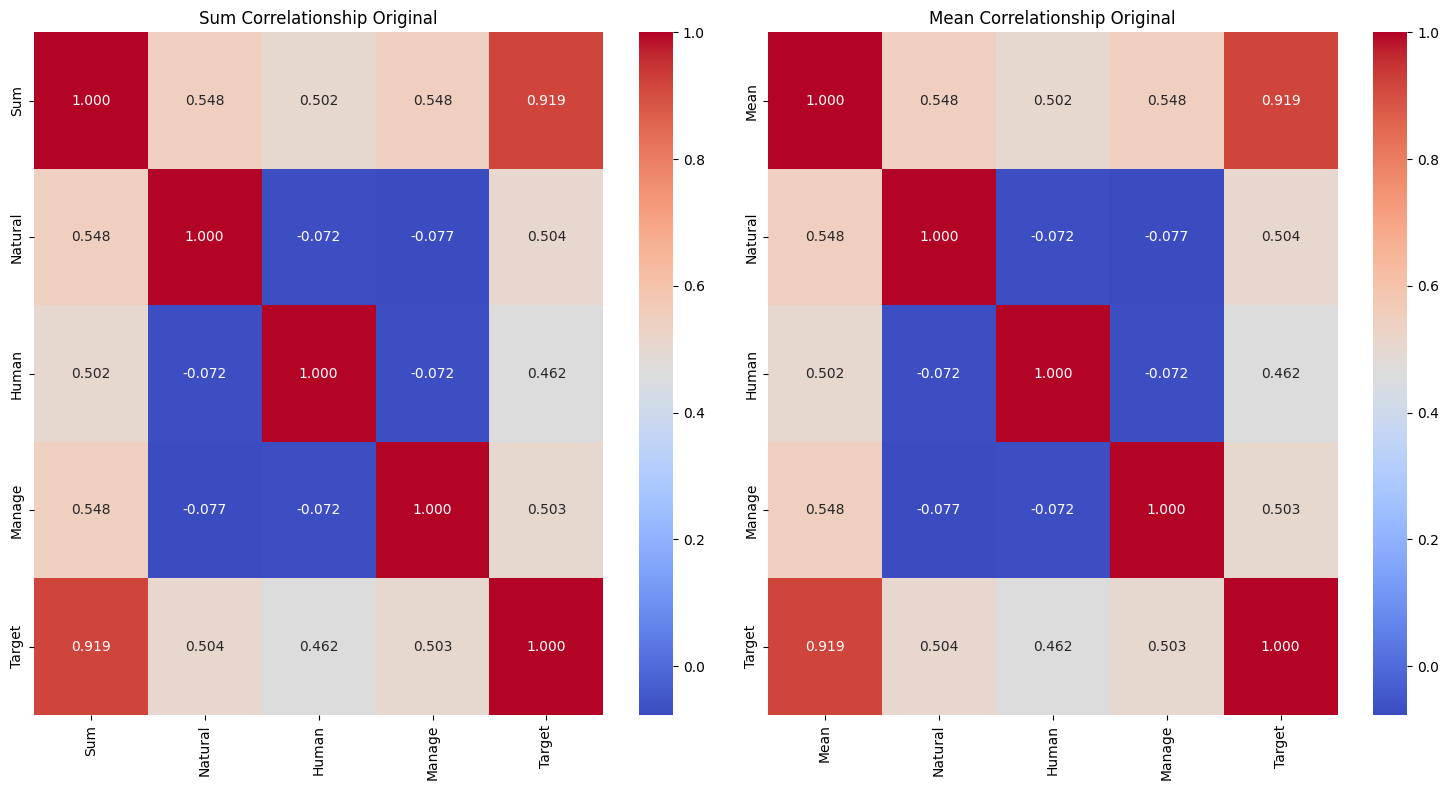

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.heatmap(new_sum.corr(), cmap='coolwarm',ax=ax[0],annot=True,fmt=".3f")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_title('Sum Correlationship Original')

sns.heatmap(new_mean.corr(), cmap='coolwarm',ax=ax[1],annot=True,fmt=".3f")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_title('Mean Correlationship Original')

plt.tight_layout()
plt.show()

In [20]:
def determine_cause(row):
    max_score = max(row['Natural'], row['Human'], row['Manage'])
    cause = []
    if row['Natural'] == max_score:
        cause.append('Natural')
    if row['Human'] == max_score:
        cause.append('Human')
    if row['Manage'] == max_score:
        cause.append('Manage')
    return '_'.join(cause) if len(cause) > 1 else cause[0]

new_sum['Cause'] = new_sum.apply(determine_cause, axis=1)
new_mean['Cause'] = new_mean.apply(determine_cause, axis=1)

In [21]:
new_sum

,Sum,Natural,Human,Manage,Target,Cause
id,,,,,,
0,94,33,28,33,0.445,Natural_Manage
1,94,29,30,35,0.450,Manage
2,99,35,25,39,0.530,Manage
3,104,35,34,35,0.535,Natural_Manage
4,72,28,22,22,0.415,Natural
...,...,...,...,...,...,...
1117952,99,32,40,27,0.495,Human
1117953,96,29,29,38,0.480,Manage
1117954,98,35,27,36,0.485,Manage


In [22]:
new_mean

,Mean,Natural,Human,Manage,Target,Cause
id,,,,,,
0,4.70,4.714286,4.666667,4.714286,0.445,Natural_Manage
1,4.70,4.142857,5.000000,5.000000,0.450,Human_Manage
2,4.95,5.000000,4.166667,5.571429,0.530,Manage
3,5.20,5.000000,5.666667,5.000000,0.535,Human
4,3.60,4.000000,3.666667,3.142857,0.415,Natural
...,...,...,...,...,...,...
1117952,4.95,4.571429,6.666667,3.857143,0.495,Human
1117953,4.80,4.142857,4.833333,5.428571,0.480,Manage
1117954,4.90,5.000000,4.500000,5.142857,0.485,Manage


In [23]:
def create_sum_test(df):
    df1 = df.copy()
    df1['Sum'] = df1.sum(axis=1)
    df1['Natural'] = df1[natural].sum(axis=1)
    df1['Human'] = df1[human].sum(axis=1)
    df1['Manage'] = df1[manage].sum(axis=1)
    return df1.iloc[:,-4:]

test_sum = create_sum_test(test)
test_sum['Cause'] = test_sum.apply(determine_cause, axis=1)
test_sum

,Sum,Natural,Human,Manage,Cause
id,,,,,
1117957,111,39,38,34,Natural
1117958,90,33,34,23,Human
1117959,90,24,28,38,Manage
1117960,92,30,25,37,Manage
1117961,92,29,30,33,Manage
...,...,...,...,...,...
1863257,94,26,27,41,Manage
1863258,89,25,33,31,Human
1863259,120,41,30,49,Manage


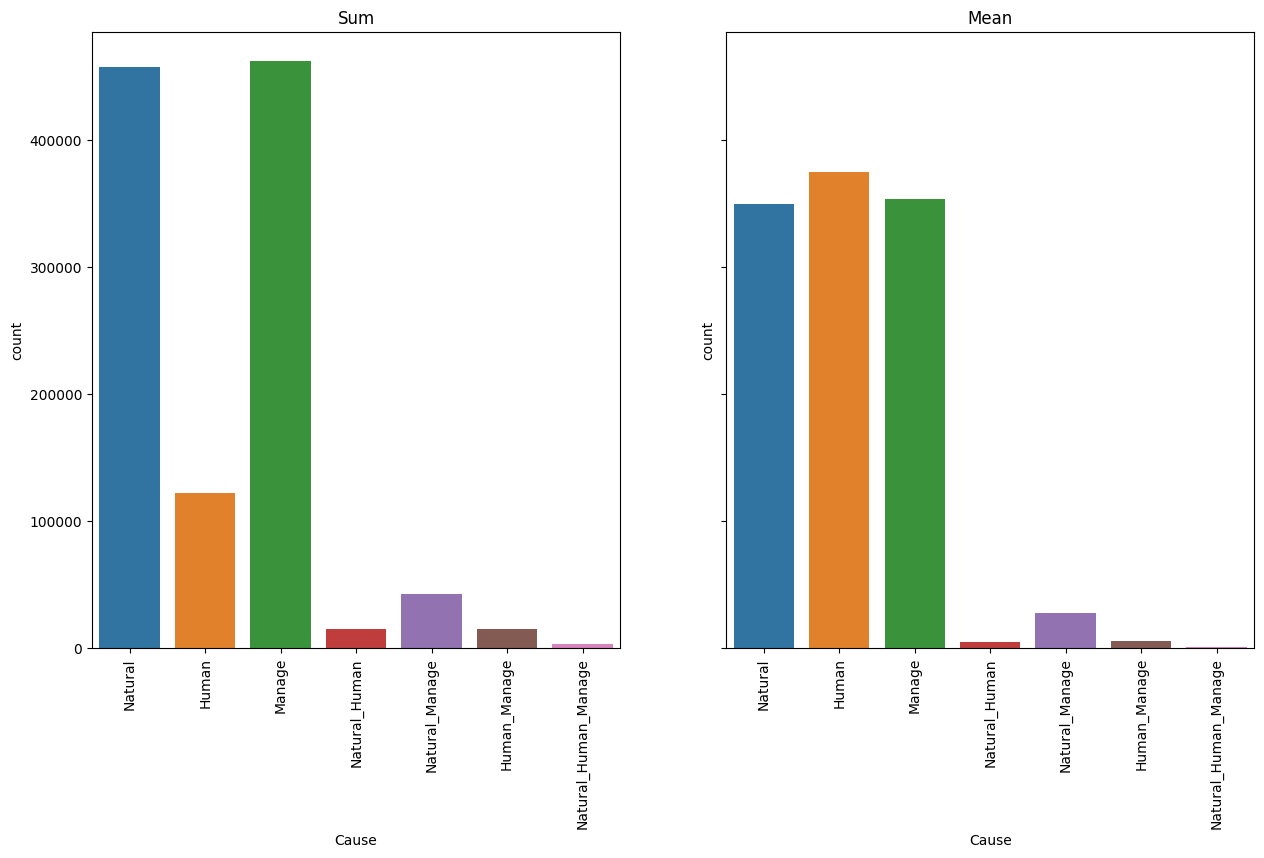

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

order = ['Natural','Human','Manage','Natural_Human','Natural_Manage','Human_Manage','Natural_Human_Manage']


fig, ax = plt.subplots(1, 2, figsize=(15, 8),sharey=True)
sns.countplot(x='Cause', data=new_sum, order=order, ax=ax[0])
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_title('Sum')

sns.countplot(x='Cause', data=new_mean, order=order, ax=ax[1])
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_title('Mean')
plt.show()

OneHotEncoder for column Cause

In [25]:
# from sklearn.preprocessing import OneHotEncoder
# def encode_cause_column(dataframe, column_name='Cause'):
#     encoder = OneHotEncoder(sparse_output=False)
#     encoded_array = encoder.fit_transform(dataframe[[column_name]])
#     encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out([column_name]))
#     encoded_all = pd.concat([dataframe.drop(column_name, axis=1), encoded_df], axis=1)
#     columns = [col for col in encoded_all.columns if col != 'Target'] + ['Target']
#     encoded_all = encoded_all[columns]
#     return encoded_all

# encoder_sum, encoder_mean = encode_cause_column(new_sum), encode_cause_column(new_mean)

In [26]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

def encode_cause_column(dataframe, column_name='Cause', status='train', encoder=None):
    # If the status is 'train', fit and transform the encoder
    if status == 'train':
        encoder = OneHotEncoder(sparse_output=False)
        encoded_array = encoder.fit_transform(dataframe[[column_name]])
    elif status == 'test':
        # If the status is 'test', transform the dataframe using the provided encoder
        if encoder is None:
            raise ValueError("Encoder must be provided for test data")
        encoded_array = encoder.transform(dataframe[[column_name]])
    else:
        raise ValueError("Status must be either 'train' or 'test'")
    
    # Create a DataFrame from the encoded array
    encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out([column_name]))
    
    # Combine the original dataframe (without the 'Cause' column) with the encoded dataframe
    encoded_all = pd.concat([dataframe.drop(column_name, axis=1), encoded_df], axis=1)
    
    # If the status is 'train', reorder the columns to move 'Target' to the end
    if status == 'train':
        columns = [col for col in encoded_all.columns if col != 'Target'] + ['Target']
        encoded_all = encoded_all[columns]
    
    return (encoded_all, encoder) if status == 'train' else encoded_all

# Assuming new_sum and test_sum are defined dataframes
encoder_sum, encoder = encode_cause_column(new_sum, column_name='Cause', status='train')

encoder_mean, encoder = encode_cause_column(new_mean, column_name='Cause', status='train')

encoder_test = encode_cause_column(test_sum, column_name='Cause', status='test', encoder=encoder)

In [27]:
encoder_test
df_1 = encoder_test.iloc[:,:4].dropna()
df_2 = encoder_test.iloc[:,4:].dropna()
df_2 = df_2.set_index(df_1.index)
full_test = pd.concat([df_1,df_2],axis=1)
full_test

,Sum,Natural,Human,Manage,Cause_Human,Cause_Human_Manage,Cause_Manage,Cause_Natural,Cause_Natural_Human,Cause_Natural_Human_Manage,Cause_Natural_Manage
1117957,111.0,39.0,38.0,34.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1117958,90.0,33.0,34.0,23.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1117959,90.0,24.0,28.0,38.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1117960,92.0,30.0,25.0,37.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1117961,92.0,29.0,30.0,33.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1863257,94.0,26.0,27.0,41.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1863258,89.0,25.0,33.0,31.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1863259,120.0,41.0,30.0,49.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1863260,107.0,36.0,32.0,39.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


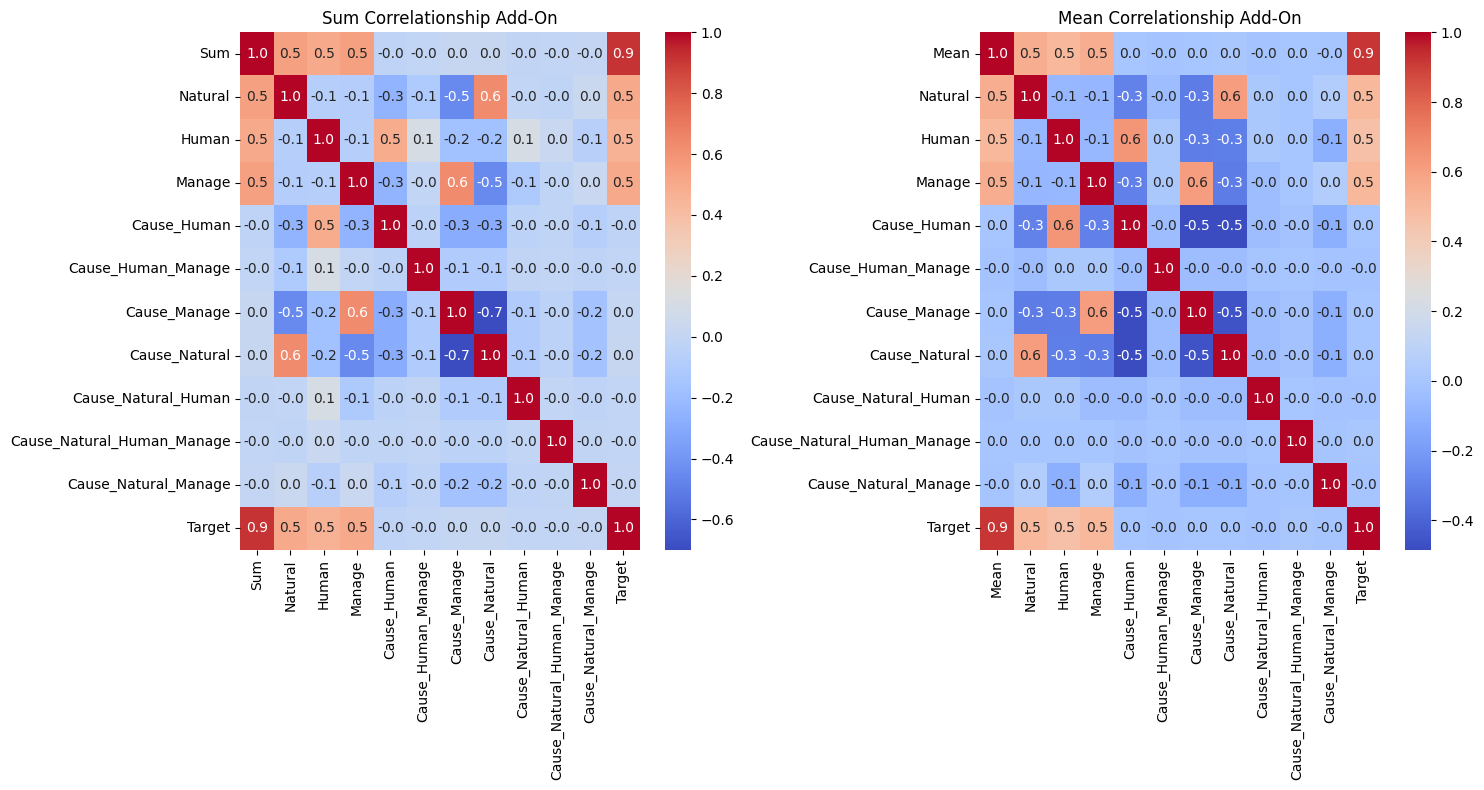

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
sns.heatmap(encoder_sum.corr(), cmap='coolwarm',ax=ax[0],annot=True,fmt=".1f")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[0].set_title('Sum Correlationship Add-On')

sns.heatmap(encoder_mean.corr(), cmap='coolwarm',ax=ax[1],annot=True,fmt=".1f")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[1].set_title('Mean Correlationship Add-On')

plt.tight_layout()
plt.show()

In [29]:
total_sum = pd.concat([encoder_sum,X],axis=1).drop('Target',axis=1)
total_mean = pd.concat([encoder_sum,X],axis=1).drop('Target',axis=1)
all_test = pd.concat([test,full_test],axis=1)
all_test = all_test[total_sum.columns]

# Target distribution:

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='FloodProbability', ylabel='Density'>

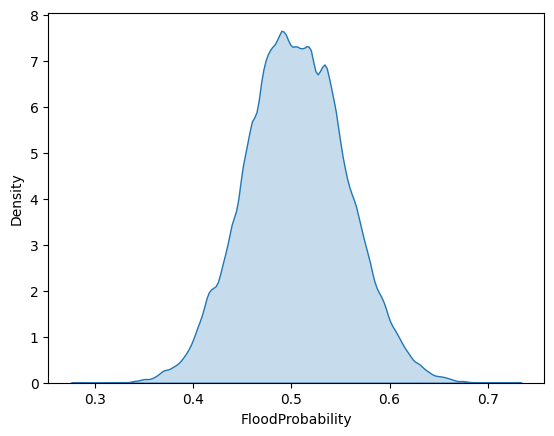

In [30]:
sns.kdeplot(x='FloodProbability',data=y,fill=True)

while the target column have the normal distribution.

In [31]:
# y.skew()

# Correlation on features:

In [32]:
# X.corr()

In [33]:
# sns.heatmap(X.corr(),cmap='coolwarm')

> This can help identify multicollinearity issues, where two or more variables are highly correlated, which can affect the performance of certain models, especially linear models like linear regression.
> 
> Once you've assessed the correlations, if you find high correlations among several features, you might consider using Principal Component Analysis (PCA)

> High Feature Correlation: If the correlation matrix reveals significant correlations (absolute values > 0.7 or < -0.7) between many features, PCA can help reduce dimensionality by capturing the variance in these correlated features into a smaller set of uncorrelated components. This can improve the performance of machine learning models that struggle with highly correlated features.

# Data modelling:

1. Train test split
1. PowerTransformer
1. Scaling

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer, StandardScaler

X_train, X_test, y_train, y_test = train_test_split(total_sum, y, test_size = 0.2, random_state = 512)

In [35]:
from sklearn.preprocessing import StandardScaler


def scale_dataframe(dataframe, status='train', scaler=None):

  if status == 'train':
    scaler = StandardScaler()
    scaled_dataframe = scaler.fit_transform(dataframe)
  elif status == 'test':
    if scaler is None:
      raise ValueError("Scaler must be provided for test data")
    scaled_dataframe = scaler.transform(dataframe)
  else:
    raise ValueError("Status must be either 'train' or 'test'")

  # Ensure column order consistency
  if status == 'test':
    dataframe_columns = dataframe.columns
    scaler_columns = scaler.get_feature_names_out(dataframe_columns)
    dataframe = dataframe[scaler_columns]  # Reorder test data to match scaler

  return (scaled_dataframe, scaler) if status == 'train' else scaled_dataframe

# Usage example
X_train_scaled, scaler = scale_dataframe(X_train, status='train')
X_test_scaled = scale_dataframe(X_test, status='test', scaler=scaler)
scaled_test = scale_dataframe(all_test, status='test', scaler=scaler)

In [36]:
# pt = PowerTransformer(method='yeo-johnson')
# X_train_power = pt.fit_transform(X_train)
# X_test_power = pt.transform(X_test)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# Linear Regression:

In [37]:
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import cross_val_score
# lr = LinearRegression(positive= False, fit_intercept= True)

# lr.fit(X_train_scaled,y_train)
# cv_lr = cross_val_score(lr,X_train_scaled,y_train,cv=10,scoring = 'r2')
# cv_lr

# Support Vector Machine:

In [38]:
# from sklearn.svm import SVR
# svr = SVR()
# svr.fit(X_train_scaled,np.ravel(y_train))
# cv_svr = cross_val_score(svr,X_train_scaled,np.ravel(y_train),cv=10,scoring='r2')

# Grid Search for SVR with C and gamma:

In [39]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR

# # Define the parameter grid
# param_grid = {'C': [0.1, 1, 10], 'gamma': [0.00001, 0.0001, 0.001, 0.01, 0.1]}

# # Create the SVR model
# svr = SVR()

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(svr, param_grid, cv=5)
# grid_search.fit(X_train_scaled,np.ravel(y_train))

# # Print the best parameters found
# print("Best Parameters SVR:", grid_search.best_params_)
# # grid_search.best_params_

# SGDRegressor:

Best Parameters SGD: {'alpha': 0.001, 'loss': 'huber'}

In [40]:
# # from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import SGDRegressor
# from sklearn.model_selection import cross_val_score

# sgd = SGDRegressor(alpha = 0.001,loss = 'huber')

# # Instantiate the GridSearchCV object and run the search
# # parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
# #              'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive']}
# # searcher = GridSearchCV(sgd, parameters, cv=10)
# sgd.fit(X_train_scaled,np.ravel(y_train))
# cv_sgd = cross_val_score(sgd,X_train_scaled,np.ravel(y_train),cv=10,scoring='r2')

# cv_sgd

# Ensemble Gradient Boosting Machines (GBM):

In [41]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # Initialize the Gradient Boosting Regressor
# gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=512)

# # Train the model
# gbr.fit(X_train_scaled,np.ravel(y_train))

# XGBoost:

In [42]:
# submit = pd.read_csv('/kaggle/input/playground-series-s4e5/sample_submission.csv')
# test_pt = pt.transform(test)
# test_scale = scaler.transform(test_pt)

# test_scale

In [43]:
# import xgboost as xgb

# dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
# dtest = xgb.DMatrix(X_test_scaled, label=y_test)
# check = xgb.DMatrix(test_scale)

# # Define parameters
# params = {
#     'objective': 'reg:squarederror',  # Regression task
#     'eval_metric': 'rmse',            # Root Mean Squared Error
#     'eta': 0.1,                       # Learning rate
#     'max_depth': 6,                   # Maximum depth of a tree
#     'subsample': 0.8,                 # Subsample ratio of the training instances
#     'colsample_bytree': 0.8           # Subsample ratio of columns when constructing each tree
# }

# # Train the model
# num_boost_round = 1000
# early_stopping_rounds = 10
# watchlist = [(dtrain, 'train'), (dtest, 'eval')]

# xgb = xgb.train(params, dtrain, num_boost_round=num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds)
# # xgb_predict = xgb.predict(check)
# # xgb_predict

In [44]:
# import xgboost as xgb

# xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5)
# xgb.fit(X_train_scaled,np.ravel(y_train))

# Catboost:

In [45]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor(iterations=1000,  # number of trees to build
                          learning_rate=0.1,  # learning rate
                          depth=6)

cat.fit(X_train_scaled,np.ravel(y_train), verbose=100) 

0:	learn: 0.0468337	total: 185ms	remaining: 3m 4s
100:	learn: 0.0186593	total: 9.43s	remaining: 1m 23s
200:	learn: 0.0186039	total: 18.3s	remaining: 1m 12s
300:	learn: 0.0185728	total: 28s	remaining: 1m 5s
400:	learn: 0.0185474	total: 37.7s	remaining: 56.2s
500:	learn: 0.0185257	total: 47.3s	remaining: 47.1s
600:	learn: 0.0185067	total: 57.3s	remaining: 38s
700:	learn: 0.0184889	total: 1m 6s	remaining: 28.5s
800:	learn: 0.0184723	total: 1m 16s	remaining: 19s
900:	learn: 0.0184567	total: 1m 26s	remaining: 9.5s
999:	learn: 0.0184412	total: 1m 36s	remaining: 0us


# LightGBM:

In [46]:
# import lightgbm as lgb

# # Define model parameters (optional, adjust as needed)
# params = {
#     "objective": "regression",  # Set objective for regression
#     "metric": "l2",  # Evaluation metric (l2 for mean squared error)
#     "learning_rate": 0.1,  # Learning rate
#     "num_leaves": 31,  # Number of leaves in trees
#     "min_data_in_leaf": 20,  # Minimum data in a leaf
# }

# # Train the LightGBM model
# lgb = lgb.LGBMRegressor(**params)
# lgb.fit(X_train_scaled,np.ravel(y_train))

# Voting Regressor:
Combine 3 models: Linear Regression, SGD, vs Catboost

In [47]:
# from sklearn.ensemble import VotingRegressor

# voting = VotingRegressor(estimators=[('LR', lr),('SGD', sgd),('catboost', cat)])
# voting.fit(X_train_scaled,np.ravel(y_train))

# Predict the test set - Calculate R2 score:

In [48]:
# compare = pd.DataFrame(cv_lr,columns = ['Linear_Regression'])
# compare['SVR'] = cv_svr
# compare['SGD'] = cv_sgd
# compare.plot(kind='box')

In [49]:
from sklearn.metrics import r2_score
r2 = pd.DataFrame()

# r2['LR'] = [r2_score(y_test,lr.predict(X_test_scaled))]
# r2['SGD'] = [r2_score(y_test,sgd.predict(X_test_scaled))]
# # r2['GBR'] = [r2_score(y_test,gbr.predict(X_test_scaled))]
# # r2['XGB'] = [r2_score(y_test,xgb.predict(X_test_scaled))]
r2['CAT'] = [r2_score(y_test,cat.predict(X_test_scaled))]
# # r2['LightLGB'] = [r2_score(y_test,lgb.predict(X_test_scaled))]
# r2['Voting'] = [r2_score(y_test,voting.predict(X_test_scaled))]

r2

,CAT
0,0.867211


# Create the submission file:

In [50]:
submit = pd.read_csv('/kaggle/input/playground-series-s4e5/sample_submission.csv')
submit

# # test_pt = pt.transform(test)
# scaler = StandardScaler()
# test_scale = scaler.transform(all_test)

submit['FloodProbability'] = cat.predict(scaled_test)
submit.to_csv('submission.csv', index=False)

In [51]:
submit

,id,FloodProbability
0,1117957,0.577215
1,1117958,0.450944
2,1117959,0.449844
3,1117960,0.470881
4,1117961,0.472151
...,...,...
745300,1863257,0.476469
745301,1863258,0.442139
745302,1863259,0.619380
745303,1863260,0.548848
